In [1]:
# remove the notebook root logger.\n",
import logging
logger = logging.getLogger()
logger.handlers = []

%matplotlib inline

In [2]:
import pandas as pd


csvfile_link = "https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/ozone-la.csv"
ozone_dataframe = pd.read_csv(csvfile_link);
import datetime
ozone_dataframe['Month'] = ozone_dataframe['Month'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m"))
ozone_dataframe.head()

,Month,Ozone
0,1955-01-01,2.7
1,1955-02-01,2.0
2,1955-03-01,3.6
3,1955-04-01,5.0
4,1955-05-01,6.5


In [3]:
def create_model(iActivateCrossVal , iFolds):
    import pyaf.ForecastEngine as autof
    lEngine = autof.cForecastEngine()
    if(iActivateCrossVal):
        lEngine.mOptions.mCrossValidationOptions.mMethod = "TSCV";
        lEngine.mOptions.mCrossValidationOptions.mNbFolds = iFolds
    lEngine.train(ozone_dataframe[:-12] , 'Month' , 'Ozone', 12);
    lEngine.getModelInfo();
    return lEngine

In [4]:
model_no_cross_valid = create_model(False , None)
model_with_cross_valid_5 = create_model(True , 5)
model_with_cross_valid_10 = create_model(True , 10)


INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Ozone'], 'Transformations': [('Ozone', 'None', '_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone', 'None', 'RelDiff_', 'T+S+R'), ('Ozone', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Transformation': 'Diff_Ozone'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Transformation': '_Ozone'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Transformation': 'CumSum_Ozone'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Transformation': 'RelDiff_Ozone'}))
/home/antoine/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/antoine/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWa

INFO:pyaf.std:AR_MODEL_COEFF 10 _Ozone_LinearTrend_residue_bestCycle_byMAPE_residue_Lag29 -0.07393479517786575
INFO:pyaf.std:AR_MODEL_DETAIL_END
INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Ozone'], 'Transformations': [('Ozone', 'None', '_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone', 'None', 'RelDiff_', 'T+S+R'), ('Ozone', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Transformation': 'CumSum_Ozone'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Transformation': '_Ozone'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Transformation': 'Diff_Ozone'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Transformation': 'RelDiff_Ozone'}))
/home/antoine/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supporte

CROSS_VAL_PERF                                             Category  ForecastMAPE
0                 NoTransf_LinearTrend_Cycle_None_AR  1.479000e-01
1                    NoTransf_LinearTrend_NoCycle_AR  1.479000e-01
2                   NoTransf_PolyTrend_Cycle_None_AR  1.670000e-01
3                      NoTransf_PolyTrend_NoCycle_AR  1.670000e-01
4     NoTransf_LinearTrend_Seasonal_MonthOfYear_NoAR  1.765000e-01
..                                               ...           ...
91  RelativeDifference_ConstantTrend_Cycle_None_NoAR  5.395511e+07
92     RelativeDifference_ConstantTrend_NoCycle_NoAR  5.395511e+07
93    RelativeDifference_LinearTrend_Cycle_None_NoAR  5.395511e+07
94       RelativeDifference_LinearTrend_NoCycle_NoAR  5.395511e+07
95         RelativeDifference_PolyTrend_NoCycle_NoAR  5.395511e+07

[96 rows x 2 columns]


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.347, ('COMPUTE_PREDICTION_INTERVALS', {'Signal': 'Ozone'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.431, ('FINALIZE_TRAINING', {'Signals': ['Ozone'], 'Transformations': [('Ozone', [('Ozone', 'None', 'CumSum_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone', 'None', 'RelDiff_', 'T+S+R'), ('Ozone', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.std:TIME_DETAIL TimeVariable='Month' TimeMin=1955-01-01T00:00:00.000000 TimeMax=1967-09-01T00:00:00.000000 TimeDelta=<DateOffset: months=1> Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Ozone' Length=204  Min=1.2 Max=8.7  Mean=3.8357843137254894 StdDev=1.491559215940118
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Ozone' Min=0.0 Max=1.0  Mean=0.35143790849673195 StdDev=0.19887456212534912
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Ozone_LinearTrend_residue_bestCycle_byMAPE_

INFO:pyaf.timing:('OPERATION_START', ('COMPUTE_PREDICTION_INTERVALS', {'Signal': 'Ozone'}))


CROSS_VAL_PERF                                             Category  ForecastMAPE
0                 NoTransf_LinearTrend_Cycle_None_AR  1.479000e-01
1                    NoTransf_LinearTrend_NoCycle_AR  1.479000e-01
2                   NoTransf_PolyTrend_Cycle_None_AR  1.670000e-01
3                      NoTransf_PolyTrend_NoCycle_AR  1.670000e-01
4     NoTransf_LinearTrend_Seasonal_MonthOfYear_NoAR  1.765000e-01
..                                               ...           ...
91  RelativeDifference_ConstantTrend_Cycle_None_NoAR  5.395511e+07
92     RelativeDifference_ConstantTrend_NoCycle_NoAR  5.395511e+07
93    RelativeDifference_LinearTrend_Cycle_None_NoAR  5.395511e+07
94       RelativeDifference_LinearTrend_NoCycle_NoAR  5.395511e+07
95         RelativeDifference_PolyTrend_NoCycle_NoAR  5.395511e+07

[96 rows x 2 columns]


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.345, ('COMPUTE_PREDICTION_INTERVALS', {'Signal': 'Ozone'}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.424, ('FINALIZE_TRAINING', {'Signals': ['Ozone'], 'Transformations': [('Ozone', [('Ozone', 'None', 'CumSum_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone', 'None', 'RelDiff_', 'T+S+R'), ('Ozone', 'None', '_', 'T+S+R')])], 'Cores': 1}))
INFO:pyaf.std:TIME_DETAIL TimeVariable='Month' TimeMin=1955-01-01T00:00:00.000000 TimeMax=1967-09-01T00:00:00.000000 TimeDelta=<DateOffset: months=1> Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Ozone' Length=204  Min=1.2 Max=8.7  Mean=3.8357843137254894 StdDev=1.491559215940118
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Ozone' Min=0.0 Max=1.0  Mean=0.35143790849673195 StdDev=0.19887456212534912
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Ozone_LinearTrend_residue_bestCycle_byMAPE_

In [5]:
model_no_cross_valid_forecast = model_no_cross_valid.forecast(ozone_dataframe, 12);
model_with_cross_valid_10_forecast = model_with_cross_valid_10.forecast(ozone_dataframe, 12);
model_with_cross_valid_5_forecast = model_with_cross_valid_5.forecast(ozone_dataframe, 12);


INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Ozone'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.256, ('FORECASTING', {'Signals': ['Ozone'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Ozone'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.251, ('FORECASTING', {'Signals': ['Ozone'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Ozone'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.25, ('FORECASTING', {'Signals': ['Ozone'], 'Horizon': 12}))


<AxesSubplot:xlabel='Month'>

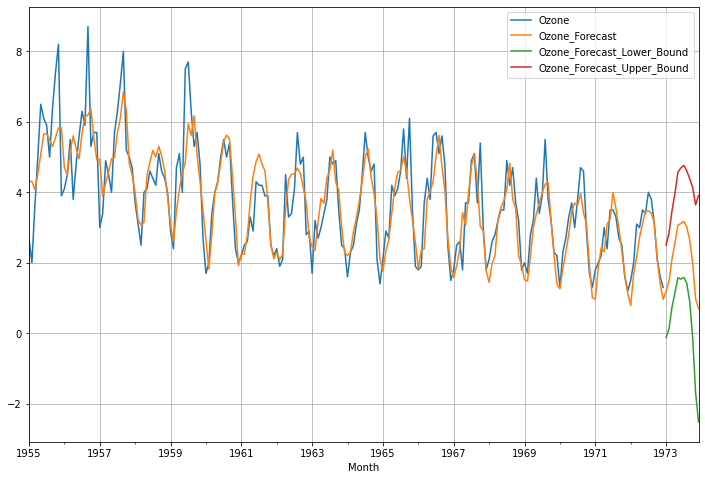

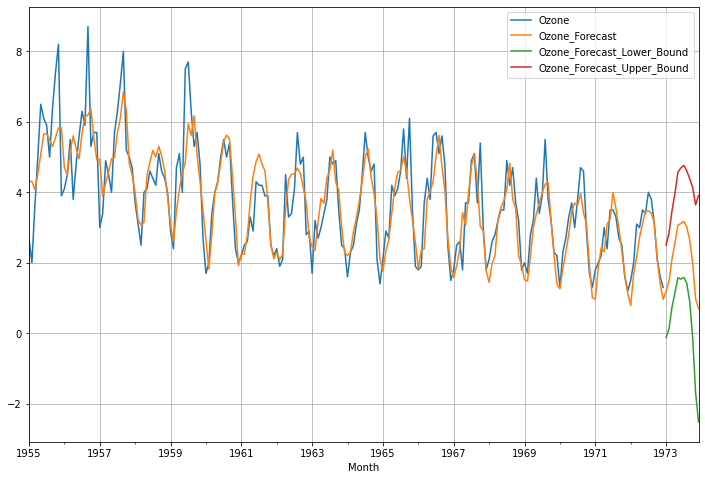

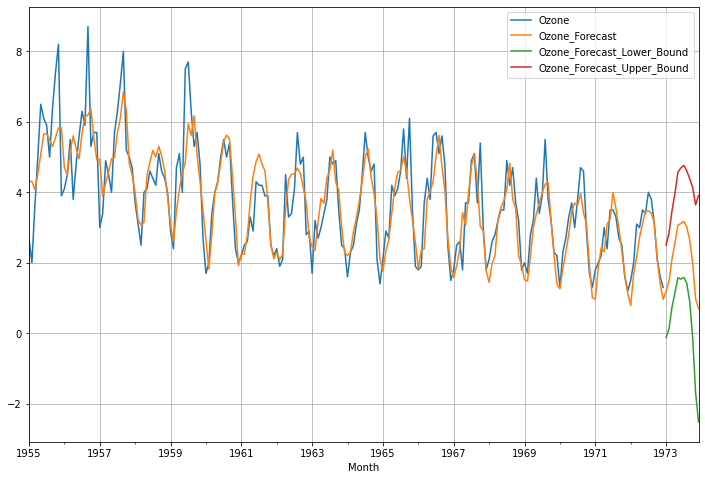

In [6]:
model_no_cross_valid_forecast.plot.line('Month', ['Ozone' , 'Ozone_Forecast', 
                                             'Ozone_Forecast_Lower_Bound', 
                                             'Ozone_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_10_forecast.plot.line('Month', ['Ozone' , 'Ozone_Forecast', 
                                             'Ozone_Forecast_Lower_Bound', 
                                             'Ozone_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_5_forecast.plot.line('Month', ['Ozone' , 'Ozone_Forecast', 
                                             'Ozone_Forecast_Lower_Bound', 
                                             'Ozone_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
